## Reading data using pandas

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv',index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 4)

## Visualizing data using seaborn

In [5]:
import seaborn as sns
%matplotlib inline

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


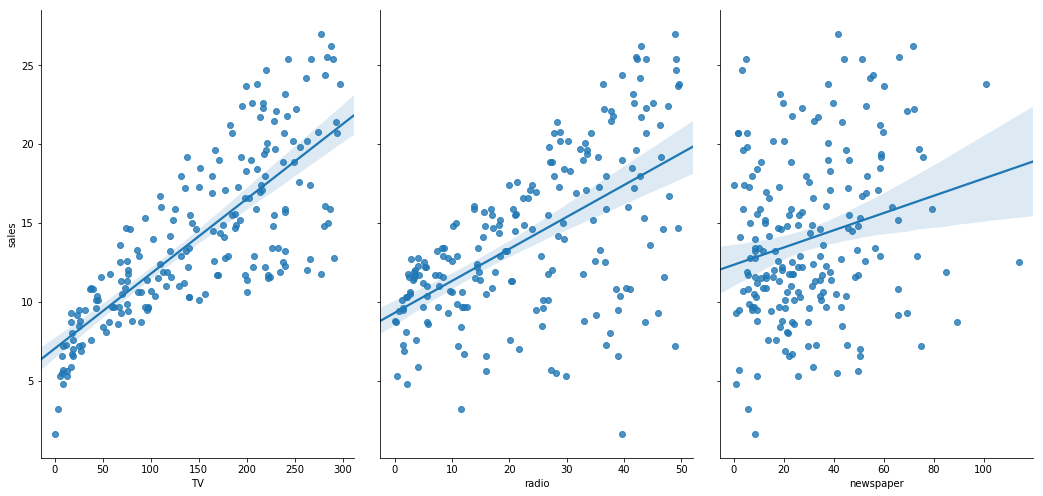

In [6]:
sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars='sales' , size=7, aspect=.7, kind='reg')

## Linear regression

### Preparing X and y using pandas

In [9]:
X=data[['TV','radio','newspaper']]
y=data[['sales']]

In [14]:
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [13]:
X.shape

(200, 3)

In [15]:
y.head()

,sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9


In [16]:
y.shape

(200, 1)

### Spliting X and y into test and training sets

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150, 1)
(50, 3)
(50, 1)


## Linear Regression in scikit-learn

In [23]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Interpreting model coefficient

In [24]:
print(linreg.intercept_)

[2.87696662]


In [25]:
print(linreg.coef_)

[[0.04656457 0.17915812 0.00345046]]


### Making prediction

In [53]:
y_pred=linreg.predict(X_test)


### Computing RMSE for our sales predictions

In [61]:
from sklearn import metrics
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382886


## Feature selection

Does Newspaper "belong" in our model? In other words, does it improve the quality of our predictions?
Let's remove it from the model and check the RMSE!

In [62]:
X=data[['TV','radio']]
y=data[['sales']]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [63]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 2)
(150, 1)
(50, 2)
(50, 1)


In [64]:
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)

In [65]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382886


The RMSE decreased when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.